### Week 1: Tour of ML classifiers

Instructor: Cornelia Ilin <br>
Email: cilin@ischool.berkeley.edu <br>


Citations: 
  - Chapter 3, Python Machine Learning 3rd Edition by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2019

### Objective: 
 - take a tour of some popular and powerful ML algorithms for supervised classification:
 
     -- perceptron
     
     -- logistic regression
     
     -- support vector machines
     
     -- Naive Bayes

### Breakout room task: 
- repeat Steps 9-25 using the 'ex2data2.txt' file you can find in live_sessions/week1/data folder.

### Step 1: Import packages

In [1]:
# general
import os
import numpy as np
import pandas as pd

# plots
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# predictions
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

### Step 2: Set working directories

### Step 3: Define classes

In [2]:
class Perceptron_self(object):
    """ Perceptron classifier
    # param eta: float, learning rate (between 0.0 and 1.0)
    # param n_iter: int, passes over the training dataset
    # param random_state: int, random number generator seed for random weight initialization
    
    # attribute w_: 1d-array, weights after fitting
    # attribute errors_: list, number of misclasifications (updates) in each epoch
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data
        # param X:array-like, shape = [n_examples, n_features]
        # param y: array_like, shape =[n_examples]
        # return self: object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)   

### Step 4: Define functions

In [3]:
def plot_decision_regions(X, y, classifier, plot_test, resolution=0.02):
    """ Plot decission regions, perceptron model
    # param X: <<your task to comment here>>
    # param y: <<your task to comment here>>
    # param classifier: <<your task to comment here>>
    # param plot_test: integer, 1 if plot test sample, 0 otherwise
    # param resolution: <<your task to comment here>>
    # return: None
    """

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
    # highlight text examples    
    if plot_test == 1:
        test_idx = range(105, 150)
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        

<hl>

___
### Classification on the Iris dataset with a user-defined Class for the Perceptron model
___

### Step 5: Read data

In [4]:
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data').replace('\\', '//')
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')
print('\nShape of data:', df.shape)
df.head()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Shape of data: (150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# print type of flowers
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

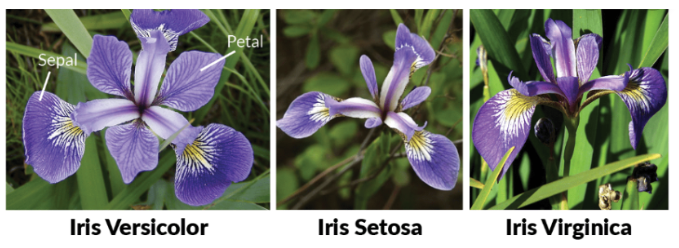

In [6]:
Image(filename='./images/iris.PNG', width = 400)

### Step 6: Plot data

we will consider only two flower classes (Setosa and Versicolor) for practical reasons.

we will also restrict the analysis to only two feature variables, sepal length and petal length (easier to visualize the decission boundary in a 2D space)

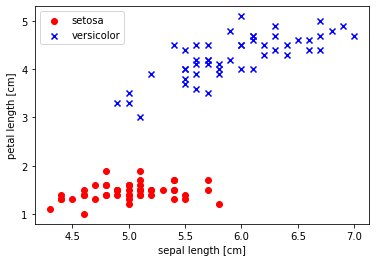

In [7]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot X data for setosa
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')

# plot X data for versicolor
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Step 7: Training the perceptron model

Question: can we use the perceptron to classify the two flowers in this dataset? <br>
The perceptron is a linear classifier, and in this example we can use a linear decission boundary to separate Setosa from Versicolor flowers.

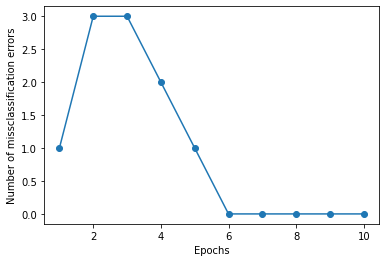

In [8]:
ppn = Perceptron_self(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of missclassification errors')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

Question: what can we conclude from this graph? <br>
Answer: that our perceptron converged after 6 iterrations (epochs) and should now be able to classify the training sample perfectly.

### Step 8: Visualize the decission boundaries

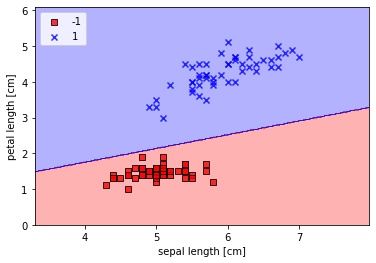

In [9]:
plot_decision_regions(X, y, classifier=ppn, plot_test=0)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

___
### Classification on the Iris dataset with scikit-learn
___

### Step 9: Read data

In [10]:
# loading the Iris dataset from scikit-learn
iris = datasets.load_iris()
pd.concat((pd.DataFrame(iris.data), pd.DataFrame(iris.target)), 1).head()

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We will use only two features, the sepal length and petal length.

We will now work with 3 classes; these are converted to integer labels: 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica. 

In [11]:
X = iris.data[:, [0, 2]]
y = iris.target 
print('Class labels: ', np.unique(y))
print('Length of data:', len(X))

Class labels:  [0 1 2]
Length of data: 150


Question: Can you work with class labels in string format?<br>
Answer: Yes, but working with integer labels is more computationally effective (smaller memory use). Encoding class labels is a common convention among most ML libraries.

### Step 10: Split data into training and test

this is needed to evaluate how well the model performs on unseen data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

the train_test_split() already shuffles the training datasets (we want a mix of all classes both in the training and test set). <br>
the stratify parameter creates training and test datasets that have the same proportions of class labels.

In [13]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


### Step 11: Feature scalling for optimal performance

We will use the StandardScaler class from scikit-learn's preprocessing module

In [14]:
sc = StandardScaler()
# estimate the sample mean and standard deviation for each feature in X_train
sc.fit(X_train)

# use the two parameters to standardize both X_train and X_test
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

___
### Train a perceptron model

### Step 12: Train

the scikit-learn library supports multiclass classification via the **one-vs.-rest(OvR)** method

In [15]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

### Step 13: Predict

In [16]:
y_pred = ppn.predict(X_test_std)
print('Length y_pred: ', len(y_pred))
y_pred

print('Misclassified examples: %d (out of 45)' % (y_test != y_pred).sum())
error = (y_test != y_pred).sum()/len(y_pred)
print('Misclassification error: %.3f' % error)
print('Accuracy: %.3f'% (1-error))

Length y_pred:  45
Misclassified examples: 10 (out of 45)
Misclassification error: 0.222
Accuracy: 0.778


### Step 13: Visualize the decission boundaries

We want to visualize how well the perceptron separates the 3 different flowers (note that this time we plot the test data as well)

<ipython-input-3-2a87683e73f6>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


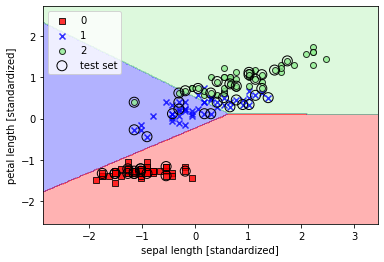

In [17]:
# combine training and test data
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, plot_test=1)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.show()

We can conclude from this plot that the 3 flower classes cannot be perfectly separated by a linear decission boundary (main assumption of the perceptron).

Let's turn our attention to more powerful classifiers. Note that we will be recyclying the data generated at Step 9-11 for the next examples.

___
### Train a logistic regression model 

This model is easy to implement and performs well on linearly separable classes.

### Step 14: Train 

In [18]:
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, multi_class='multinomial', random_state=1)

### Step 15: Predict

In [19]:
y_pred = lr.predict(X_test_std)
print('Length y_pred: ', len(y_pred))
y_pred

print('Misclassified examples: %d (out of 45)' % (y_test != y_pred).sum())
error = (y_test != y_pred).sum()/len(y_pred)
print('Misclassification error: %.3f' % error)
print('Accuracy: %.3f'% (1-error))

Length y_pred:  45
Misclassified examples: 1 (out of 45)
Misclassification error: 0.022
Accuracy: 0.978


### Step 16: Visualize the decission boundaries

The Logistic regression seems to be doing a better job at separating the 3 types of flowers.

<ipython-input-3-2a87683e73f6>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


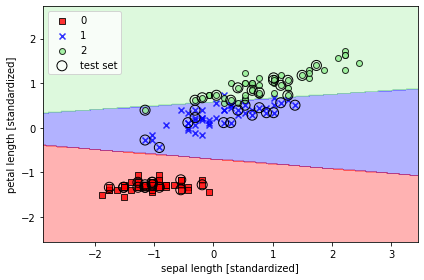

In [20]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, plot_test=1)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

___
### Train a (linear) SVM model

This model performs well on linearly separable classes. Linear logistic regression and linear SVM often yield very similar results. 

Logistic regression tries to maximize the conditional likelihood of the training data. so this means that it pays equal attention to outliers.

SVM avoids this problem, because it cares mostly about the points that are closest to the decission boundary (support vectors).

### Step 17: Train

In [21]:
svm = SVC(kernel='linear', random_state=1, C=1.0)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

### Step 18: Predict

In [22]:
y_pred = svm.predict(X_test_std)
print('Length y_pred: ', len(y_pred))
y_pred

print('Misclassified examples: %d (out of 45)' % (y_test != y_pred).sum())
error = (y_test != y_pred).sum()/len(y_pred)
print('Misclassification error: %.3f' % error)
print('Accuracy: %.3f'% (1-error))

Length y_pred:  45
Misclassified examples: 4 (out of 45)
Misclassification error: 0.089
Accuracy: 0.911


### Step 19: Visualize the decission boundaries

<ipython-input-3-2a87683e73f6>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


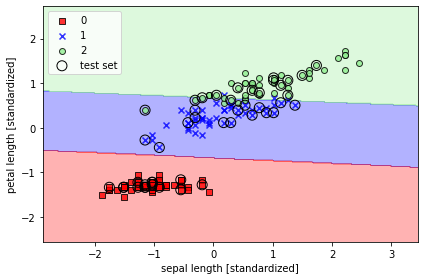

In [23]:
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, plot_test=1)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_16.png', dpi=300)
plt.show()

___
### Train a (nonlinear) SVM model: kernel SVM

SVM can be easily **kernalized** to solve nonlinear classification problems. 

The idea is to create nonlinear combinations of the original features, and then project them onto a higher-dimensional space via a mapping function

### Step 20: Train

Question: what happens if we change the value of gamma? Let's try 100.0 (gamma increases the influence of the training examples)

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

SVC(gamma=100.0, random_state=1)

### Step 21: Predict

In [25]:
y_pred = svm.predict(X_test_std)
print('Length y_pred: ', len(y_pred))
y_pred

print('Misclassified examples: %d (out of 45)' % (y_test != y_pred).sum())
error = (y_test != y_pred).sum()/len(y_pred)
print('Misclassification error: %.3f' % error)
print('Accuracy: %.3f'% (1-error))

Length y_pred:  45
Misclassified examples: 2 (out of 45)
Misclassification error: 0.044
Accuracy: 0.956


### Step 22: Visualize the decission boundaries

<ipython-input-3-2a87683e73f6>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


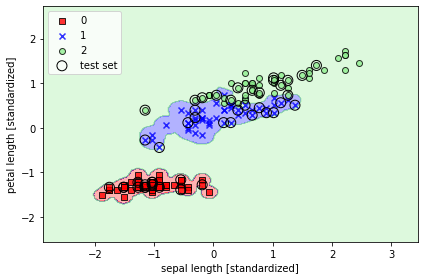

In [26]:
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, plot_test=1)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_16.png', dpi=300)
plt.show()

___
### Train a Naive Bayes model

### Step 23: Train

In [27]:
nb = GaussianNB()
nb.fit(X_train_std, y_train)

GaussianNB()

### Step 24: Predict

In [28]:
y_pred = nb.predict(X_test_std)
print('Length y_pred: ', len(y_pred))
y_pred

print('Misclassified examples: %d (out of 45)' % (y_test != y_pred).sum())
error = (y_test != y_pred).sum()/len(y_pred)
print('Misclassification error: %.3f' % error)
print('Accuracy: %.3f'% (1-error))

Length y_pred:  45
Misclassified examples: 7 (out of 45)
Misclassification error: 0.156
Accuracy: 0.844


### Step 25: Visualize the decission boundaries

<ipython-input-3-2a87683e73f6>:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


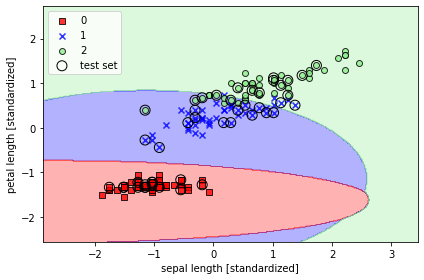

In [29]:
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=nb, plot_test=1)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_16.png', dpi=300)
plt.show()